In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
from IPython.display import HTML
from IPython.display import display
import numpy as np
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.optimize import curve_fit

from sklearn import preprocessing
from sklearn import metrics
os.chdir("..")
os.getcwd()

from platform import python_version
print(python_version())

import importlib.util


spec_data_pred = importlib.util.spec_from_file_location("data_pred", "src/data_prep.py")
prep_data = importlib.util.module_from_spec(spec_data_pred)
spec_data_pred.loader.exec_module(prep_data)

spec_plotting_printing = importlib.util.spec_from_file_location("plotting_printing", "src/plotting_printing.py")
plotting_printing = importlib.util.module_from_spec(spec_plotting_printing)
spec_plotting_printing.loader.exec_module(plotting_printing)

3.8.10


In [2]:
os.getcwd()

'/home/ubuntu/repos/training_dataset_size_per_class'

### Purpose of this notebook: 

# Doing exeriments with different scaling laws

# Data prep

Please run `cifar10_datasetsize_multidim.py` before running this notebook.


In [3]:
model_type = "arctan_all_epochs"
save_plots = False

In [4]:
results_from_file = pd.read_csv("csv_files/Cifar10_acc_subsets_jf_batch_size_512_reset_fc_output_size_mixture_design_maximin_20230927.csv")
results_val_from_file = pd.read_csv("csv_files/Cifar10_val_acc_subsets_thomas_batch_size_512_reset_fc_output_size_mixture_design_maximin_20231103.csv")
# the following may need to be recalculated?
results_4500_from_file = pd.read_csv("csv_files/Cifar10_acc_subsets_jelena_batch_size_512_mixture_design_maximin_subsetsize_4500_20230715.csv")


In [5]:
#results_from_file = pd.read_csv("csv_files/Cifar10_acc_subsets_thomas_batch_size_512_mixture_design_maximin_subsetsize_45000_20230705.csv")
#results_val_from_file = pd.read_csv("csv_files/Cifar10_acc_subsets_thomas_batch_size_512_mixture_design_maximin_subsetsize_45000_val_20230708.csv")
#results_4500_from_file = pd.read_csv("csv_files/Cifar10_acc_subsets_jelena_batch_size_512_mixture_design_maximin_subsetsize_4500_20230715.csv")

#prep_data
data_dict = prep_data.prep_data_all_epochs(results_from_file, 
              results_val_from_file, 
              results_4500_from_file, 
              min_epoch = 20)

# the following unacks all dict items into a corresonding variable:
locals().update(data_dict)

['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
{} &  accs &  plane &   car &  bird &    cat &  deer &    dog &   frog &   horse &   ship &  truck &  epochs\_trained &  total\_training\_size \\
\midrule
0 &  0.37 & 888.00 & 99.00 & 93.00 & 459.00 & 93.00 & 674.00 & 351.00 & 1257.00 & 541.00 & 545.00 &              20 &              5000.00 \\
1 &  0.39 & 888.00 & 99.00 & 93.00 & 459.00 & 93.00 & 674.00 & 351.00 & 1257.00 & 541.00 & 545.00 &              25 &              5000.00 \\
2 &  0.32 & 888.00 & 99.00 & 93.00 & 459.00 & 93.00 & 674.00 & 351.00 & 1257.00 & 541.00 & 545.00 &              30 &              5000.00 \\
3 &  0.40 & 888.00 & 99.00 & 93.00 & 459.00 & 93.00 & 674.00 & 351.00 & 1257.00 & 541.00 & 545.00 &              35 &              5000.00 \\
4 &  0.42 & 888.00 & 99.00 & 93.00 & 459.00 & 93.00 & 674.00 & 351.00 & 1257.00 & 541.00 & 545.00 &              40 &              5000.00 \\
\bottomrule
\

,itterations,accs,training_times,plane,car,bird,cat,deer,dog,frog,horse,ship,truck,epochs_trained,total_training_size
0,0,0.7703,95.387190,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,20,45500.0
1,0,0.7833,95.093551,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,25,45500.0
2,0,0.7774,94.994801,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,30,45500.0
3,0,0.7967,94.904114,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,35,45500.0
4,0,0.8035,95.364757,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,40,45500.0


(12, 10800)


,itterations,accs,training_times,plane,car,bird,cat,deer,dog,frog,horse,ship,truck,epochs_trained,total_training_size
0,0,0.7703,95.387190,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,20,45500.0
1,0,0.7833,95.093551,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,25,45500.0
2,0,0.7774,94.994801,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,30,45500.0
3,0,0.7967,94.904114,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,35,45500.0
4,0,0.8035,95.364757,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,40,45500.0


In [6]:
"otentially to be deleted "
#props = dict(boxstyle='round', facecolor='white', alpha=0.5)


'otentially to be deleted '

### using a logscaling effect with 2 params for every class:

In [7]:
y_hat_name = "accs_hat_classes_logscaling_epoch_logscaling"

def func(x, a: float, b: float, c: float, d0:float, d0_2:float, d1:float, d1_2:float, d2:float, d2_2:float, d3:float, d3_2:float, d4:float, d4_2:float, d5:float, d5_2:float, d6:float, d6_2:float, d7:float, d7_2:float, d8:float, d8_2:float, d9:float, d9_2:float, d_epochs:float, d_epoch_2:float) -> float:
    x0 = x[0]
    x1 = x[1]
    x2 = x[2]
    x3 = x[3]
    x4 = x[4]
    x5 = x[5]
    x6 = x[6]
    x7 = x[7]
    x8 = x[8]
    x9 = x[9]
    epochs_trained = x[10]
    result = a + (2 / np.pi) * np.arctan(b * (d0* np.log(d0_2 + x0) + d1* np.log(d1_2 + x1)  + d2* np.log(d2_2 + x2) + d3 * np.log(d3_2 + x3) + d4 * np.log(d4_2 + x4) + d5 * np.log(d5_2 + x5) + d6 * np.log(d6_2 + x6) + d7 * np.log(d7_2 + x7) + d8 * np.log(d8_2 + x8) + d9 * np.log(d9_2 + x9) + d_epochs*np.log(d_epoch_2 + epochs_trained)) + c)# this one works quite ok for the 45oo examle
    return result

np.random.seed(seed=421530)
n_p = 25
p0 = np.random.uniform(low=0.2, high=1, size = n_p)
converged = False
#try:
params, params_cov = curve_fit(func, xdata, y, maxfev=200000, p0=p0, bounds=(1e-5, 50))
converged = True
#except:
#    print("did not converge")
np.diag(params_cov)


array([1.00733781e-05, 1.34039401e+06, 4.70632048e-05, 7.05647188e+06,
       2.69462343e-08, 1.07296070e+07, 1.42726224e-07, 1.19879960e+07,
       1.91569473e-06, 9.94695139e+06, 1.11508418e-05, 1.54269106e+07,
       9.21839655e-07, 6.07012731e+06, 1.11954195e-06, 1.11185292e+07,
       4.10308867e-08, 1.25020036e+07, 5.49304466e-09, 8.86577400e+06,
       4.04018311e-09, 1.09602184e+07, 2.40215968e-08, 9.67158257e+07,
       3.96246837e-07])

In [8]:
#tm = func(xdata_val, *params)
#type(tm)
#pd.DataFrame(xdata_val.T).loc[pd.Series(tm).isna(),:]

param_name,a,b,c,plane_1,plane_2,car_1,car_2,bird_1,bird_2,cat_1,cat_2,deer_1,deer_2,dog_1,dog_2,frog_1,frog_2,horse_1,horse_2,ship_1,ship_2,truck_1,truck_2,epoch_1,epoch_2
param_value,0.466887,0.093528,0.709628,0.214594,0.00083,0.264615,0.002706,0.279703,0.016698,0.254782,0.03224,0.317295,0.011882,0.199032,0.006407,0.269369,0.001748,0.285636,0.000433,0.240537,0.000334,0.267444,0.00113,0.79446,0.020388


\begin{tabular}{lrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
param\_name &    a &    b &    c &  plane\_1 &  plane\_2 &  car\_1 &  car\_2 &  bird\_1 &  bird\_2 &  cat\_1 &  cat\_2 &  deer\_1 &  deer\_2 &  dog\_1 &  dog\_2 &  frog\_1 &  frog\_2 &  horse\_1 &  horse\_2 &  ship\_1 &  ship\_2 &  truck\_1 &  truck\_2 &  epoch\_1 &  epoch\_2 \\
\midrule
param\_value & 0.47 & 0.09 & 0.71 &     0.21 &     0.00 &   0.26 &   0.00 &    0.28 &    0.02 &   0.25 &   0.03 &    0.32 &    0.01 &   0.20 &   0.01 &    0.27 &    0.00 &     0.29 &     0.00 &    0.24 &    0.00 &     0.27 &     0.00 &     0.79 &     0.02 \\
\bottomrule
\end{tabular}

0.0006213033832911595


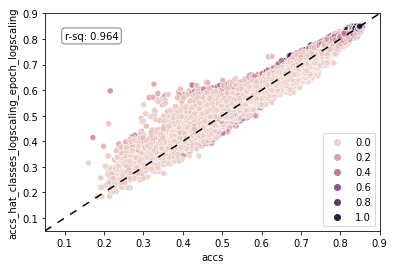

0.9643679525851759
mean val loss: nan


/tmp/ipykernel_3939/3383598592.py:15: RuntimeWarning: invalid value encountered in log
  result = a + (2 / np.pi) * np.arctan(b * (d0* np.log(d0_2 + x0) + d1* np.log(d1_2 + x1)  + d2* np.log(d2_2 + x2) + d3 * np.log(d3_2 + x3) + d4 * np.log(d4_2 + x4) + d5 * np.log(d5_2 + x5) + d6 * np.log(d6_2 + x6) + d7 * np.log(d7_2 + x7) + d8 * np.log(d8_2 + x8) + d9 * np.log(d9_2 + x9) + d_epochs*np.log(d_epoch_2 + epochs_trained)) + c)# this one works quite ok for the 45oo examle


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

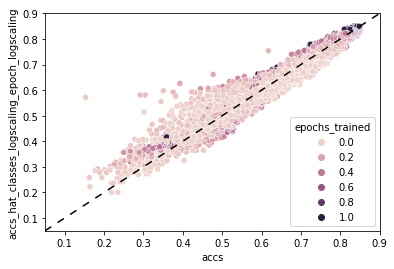

In [9]:
param_names = ["a", "b",  "c"]
for c in classes:
    param_names = param_names + [f"{c}_1", f"{c}_2"]
param_names = param_names + ["epoch_1", "epoch_2"]

if converged:
    plotting_printing.plotting_printing_all_epochs(func, model_type, y_hat_name, xdata, y, param_names,  params, results, xdata_val, y_val, results_val, xdata_4500, xdata_pred, results_pred_orig, results_4500, results_4500_orig, saving_plots=save_plots, is_2param=False)
    results = plotting_printing.forward_testing(results_orig, results_orig, results, func, n_p, xdata, y, xdata, y_hat_name, bounds=(1e-5, 50))
    plotting_printing.plot_forward_testing(results, y_hat_name)
    results_val = plotting_printing.forward_testing(results_orig, results_val_orig, results_val, func, n_p, xdata, y, xdata_val, y_hat_name, bounds=(1e-5, 50))
    plotting_printing.plot_forward_testing(results_val, y_hat_name)

In [10]:
#
y_hat_name = "accs_hat_total_n_logscaling_epoch_logscaling"

def func(x, a: float, b: float, c: float, d_total_n:float, d_total_n_2:float, d_epochs:float, d_epochs_2:float) -> float:
    x_epoch = x[10]
    x_total_n = x[11]
    result = a + (2 / np.pi) * np.arctan(b * (d_total_n * np.log(d_total_n_2 + x_total_n) + d_epochs * np.log(d_epochs_2 + x_epoch)) + c)
    return result

np.random.seed(seed=434222)
n_p = 7
p0 = np.random.uniform(low=0, high=1, size = n_p)
converged = False
try:
    params, params_cov = curve_fit(func, xdata, y, maxfev=200000, p0=p0, bounds=(0, 10))
    converged = True
except:
    print("did not converge")


param_name,a,b,c,total_n,total_n_2,epoch,epoch_2
param_value,0.275636,0.984998,0.382413,1.239288,0.978809,0.099555,0.023596


\begin{tabular}{lrrrrrrr}
\toprule
param\_name &    a &    b &    c &  total\_n &  total\_n\_2 &  epoch &  epoch\_2 \\
\midrule
param\_value & 0.28 & 0.98 & 0.38 &     1.24 &       0.98 &   0.10 &     0.02 \\
\bottomrule
\end{tabular}

0.001774802742527216


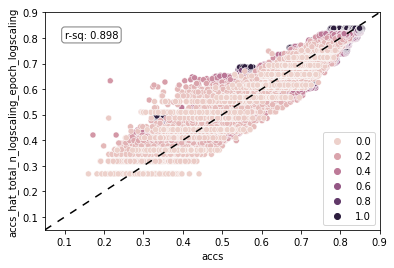

0.8982142103609734
mean val loss: 0.001938839791142284


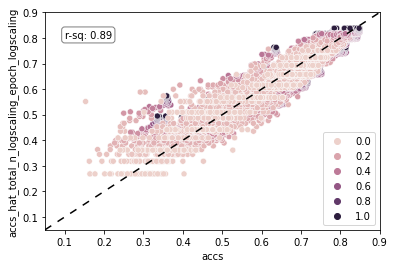

r_square val: 0.8903278932845072


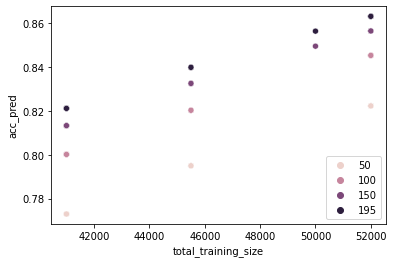

,training_times,plane,car,bird,cat,deer,dog,frog,horse,ship,truck,epochs_trained,total_training_size,acc_pred
0,100.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,195,50000.0,0.856431
1,100.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,150,50000.0,0.849575
2,100.0,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,195,45500.0,0.839908
3,100.0,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,150,45500.0,0.832587
4,100.0,5000.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,4500.0,100,45500.0,0.820345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,100.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,7000.0,5000.0,50,52000.0,0.822330
118,100.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,7000.0,195,52000.0,0.863172
119,100.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,7000.0,150,52000.0,0.856503
120,100.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,7000.0,100,52000.0,0.845357


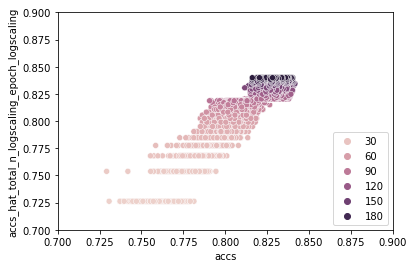

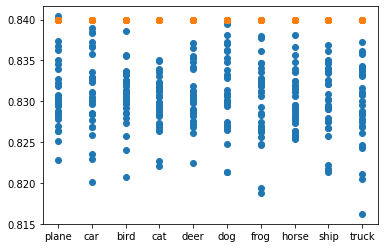

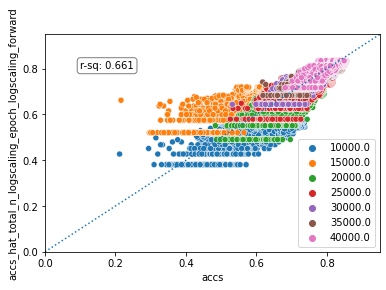

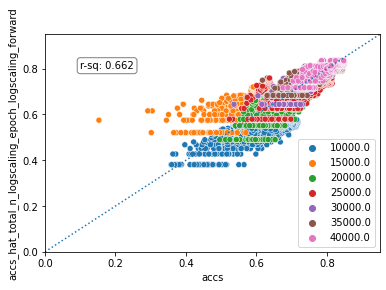

In [11]:
param_names = ["a", "b", "c", "total_n", "total_n_2", "epoch", "epoch_2"]

if converged:
    plotting_printing.plotting_printing_all_epochs(func, model_type, y_hat_name, xdata, y, param_names,  params, results, xdata_val, y_val, results_val, xdata_4500, xdata_pred, results_pred_orig, results_4500, results_4500_orig, saving_plots=save_plots, is_2param=False)
    results = plotting_printing.forward_testing(results_orig, results_orig, results, func, n_p, xdata, y, xdata, y_hat_name, bounds=(1e-5, 50))
    plotting_printing.plot_forward_testing(results, y_hat_name)
    results_val = plotting_printing.forward_testing(results_orig, results_val_orig, results_val, func, n_p, xdata, y, xdata_val, y_hat_name, bounds=(1e-5, 50))
    plotting_printing.plot_forward_testing(results_val, y_hat_name)
